In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Flàvia Ferrús and David Rosado.

#Stochastic gradient descent for SVM

Firstly, let us define the dataset in the same way that in Practical 5. Although it is recommended to work with the separable case, the non-separable case is available. Let us also define the primal problem in an unconstrained way.

In [ ]:
#Creation of the dataset
def dataset(n_points, separable = True):
    m1 = np.array([0., 0.])
    s1 = np.array([[1., -0.9], [-0.9, 1.]])
    if separable:
        m2 = np.array([3., 6.])
        s2 = np.array([[1., 0.], [0., 1.]])
    else:
        m2 = np.array([1., 2.])
        s2 = np.array([[1., 0.], [0., 1.]])

    pos_class = np.random.multivariate_normal(m1, s1, n_points)
    neg_class = np.random.multivariate_normal(m2, s2, n_points)
    x = np.concatenate((pos_class, neg_class)).T
    y = np.concatenate((np.ones(n_points), -1*np.ones(n_points)))

    return x,y
#Primal problem function
def f(x,y,w,b,lamb):
  res = (lamb / 2) * np.dot(w.T,w) + np.sum(np.maximum(0, 1 - y*(np.dot(w.T, x) + b)))
  return res


## Experiment 1

Let us perform the classical stochastic gradient descent. We will start with a relatively small value of $\gamma_t$, for instance,$\gamma_t = 1/\mu$, with $\mu$ initialized to $\mu=100$. The value of $\mu$ is increased after each iteration. We are recommended to use $\lambda = 10^{-4}$ or $\lambda = 10^{-2}$.

In [ ]:
def sgd(x,y,mu,increase_value,lamb,maximum_epochs):
  #Initilize parameters
  w = np.random.rand(x.shape[0])
  b = np.random.rand(1)[0] # we want a real value
  function = []

  #Start the iterative algorithm
  epoch = 0
  while epoch < maximum_epochs:
    #shuffle the data
    perm = np.random.permutation(x.shape[1])
    x = x[:,perm]
    y = y[perm]
    #Update parameters
    for i in range(x.shape[1]):
      if y[i] * (np.dot(w.T, x[:,i]) + b) > 1:
        w += -(1/mu) * lamb * w
      else :
        w += -(1/mu) * lamb * w +(1/mu)* y[i] * x[:,i]
        b += (1/mu) * y[i]
    #Increase the value of mu
    mu += increase_value
    epoch+=1
    function.append(np.log(f(x,y,w,b,lamb)))
  return w,b,function

Let us check if it works

lambda=10^{-4} incrementing the mu by 1


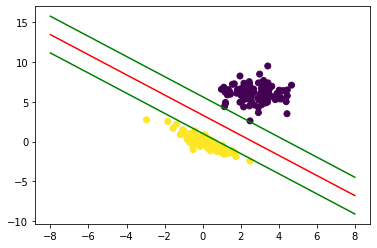

Objective function


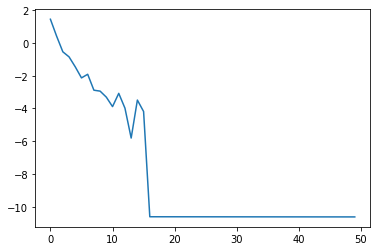

lambda=10^{-4} incrementing the mu by 0.5


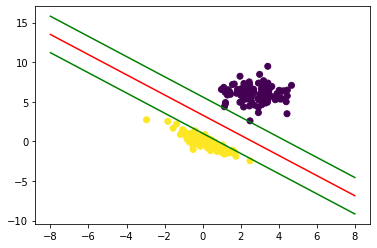

Objective function


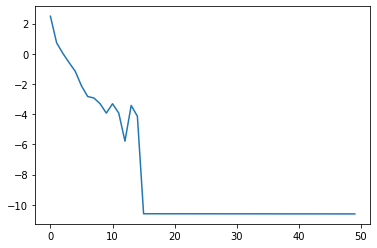

lambda=10^{-4} incrementing the mu by 0.1


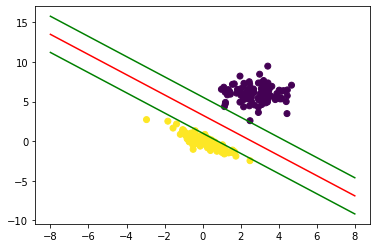

Objective function


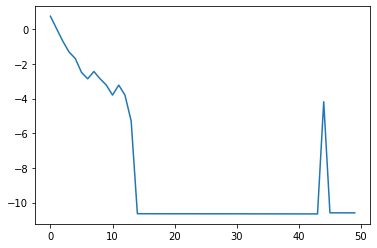

In [ ]:
#Let us prove it with lambda = 10^{-4} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd(X, y, 100, 1, 1e-4,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd(X, y, 100, 0.5, 1e-4,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd(X, y, 100, 0.1, 1e-4,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()


lambda=10^{-2} incrementing the mu by 1


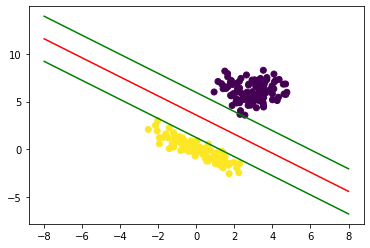

Objective function


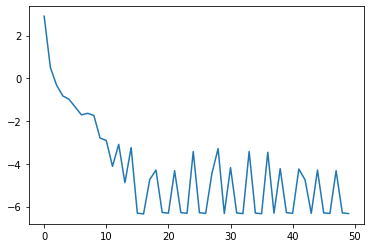

lambda=10^{-2} incrementing the mu by 0.5


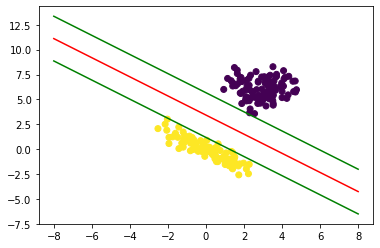

Objective function


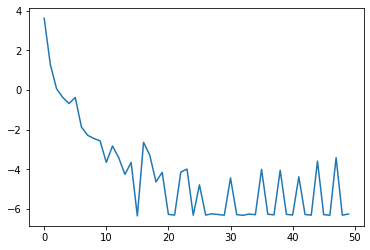

lambda=10^{-2} incrementing the mu by 0.1


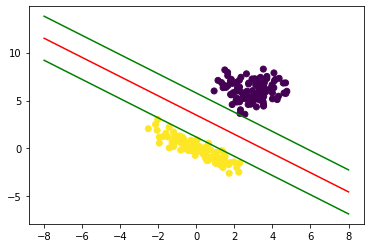

Objective function


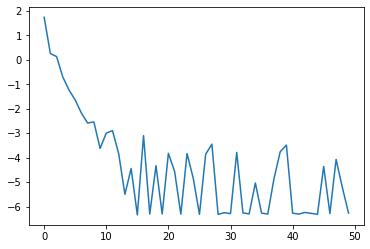

In [ ]:
#Let us prove it with lambda = 10^{-2} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd(X, y, 100, 1, 1e-2,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-2} incrementing the mu by 1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b, function = sgd(X, y, 100, 0.5, 1e-2,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-2} incrementing the mu by 0.5')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd(X, y, 100, 0.1, 1e-2,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-2} incrementing the mu by 0.1')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

The method works perfectly in any case. The number of epochs implemented is 50 although we have tested many of them in order to find an appropiate one. Neverteless, looking to the objective function, one can see that with a lower value of $\lambda$ the method converges fastly and stably to the solution while for bigger $\lambda$ the converge has an oscillatory behaviour.

##Experiment 2

Perform some experiments with the mini-batch. Take mini-batches with a size
that of 10, 20 or 50

In [ ]:
def sgd_batch(x,y,mu,increase_value,lamb,maximum_epochs,batch):
  #Initilize parameters
  w = np.random.rand(x.shape[0])
  b = np.random.rand(1)[0] # we want a real value
  function = []
  #Start the iterative algorithm
  epoch = 0
  n_batch = x.shape[1] // batch
  while epoch < maximum_epochs:
    #shuffle the data
    perm = np.random.permutation(x.shape[1])
    x = x[:,perm]
    y = y[perm]
    #Update parameters
    for i in range(n_batch):
      #Samples in the batch
      x_batch = x[:, i*batch:(i+1)*batch]
      y_batch = y[i*batch:(i+1)*batch]
      sum_w = np.zeros(w.shape)
      sum_b = 0
      for j in range(x_batch.shape[1]):
        if y_batch[j] * (np.dot(w.T, x_batch[:,j]) + b) <= 1:
          sum_w += y_batch[j] * x_batch[:,j]
          sum_b +=y_batch[j] 
      w += -(1/mu) * lamb * w + (1/mu) * sum_w
      b += (1/mu) * sum_b
    #Increase the value of mu
    mu += increase_value
    epoch+=1
    function.append(np.log(f(x,y,w,b,lamb)))
  return w,b,function


Let us chech if it works. First for $\lambda=10^{-4}$

lambda=10^{-4} incrementing the mu by 1 and batch_size=10


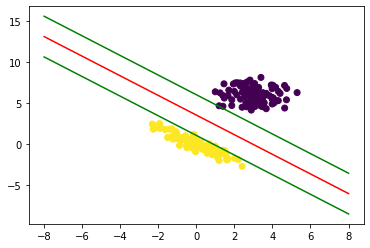

Objective function


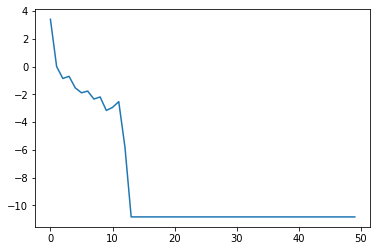

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10


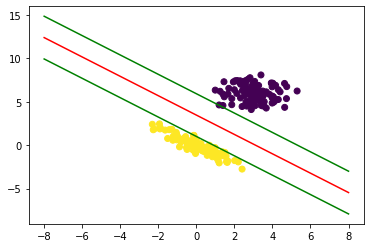

Objective function


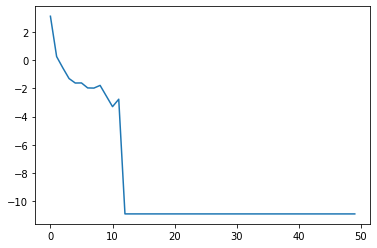

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10


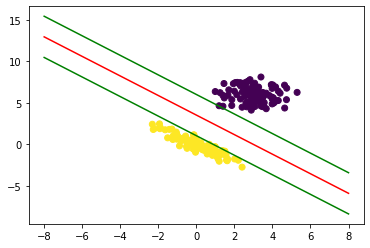

Objective function


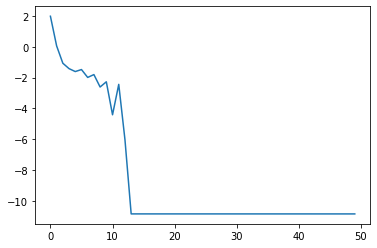

In [ ]:
#Batch size 10
#Let us prove it with lambda = 10^{-4} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=20


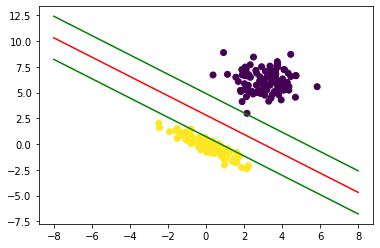

Objective function


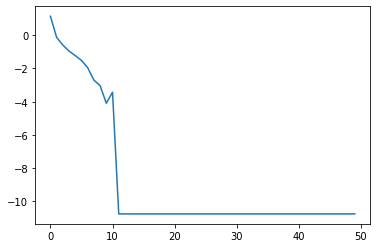

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=20


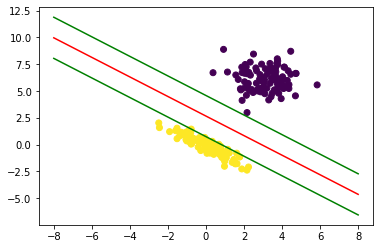

Objective function


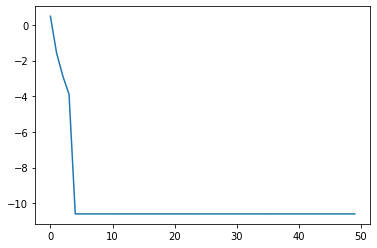

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=20


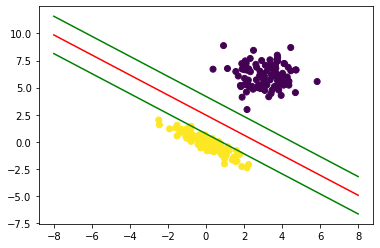

Objective function


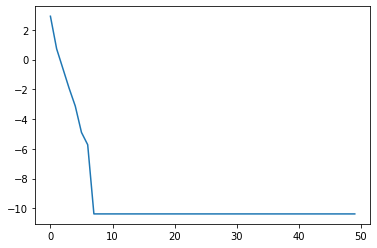

In [ ]:
#Batch size 20
#Let us prove it with lambda = 10^{-4} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=50


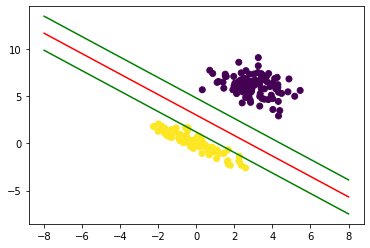

Objective function


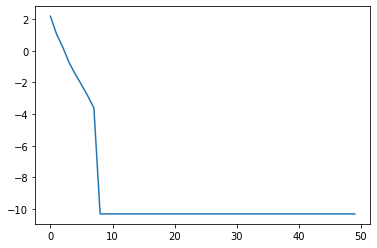

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50


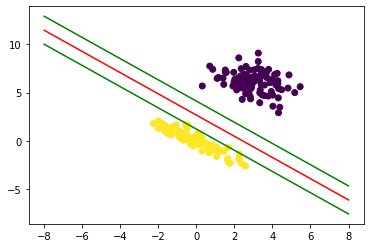

Objective function


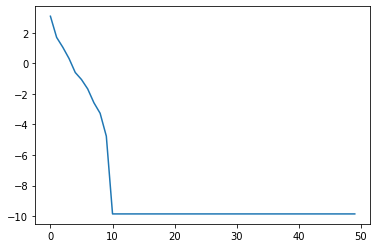

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50


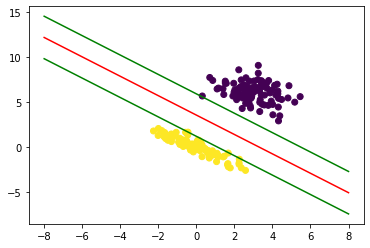

Objective function


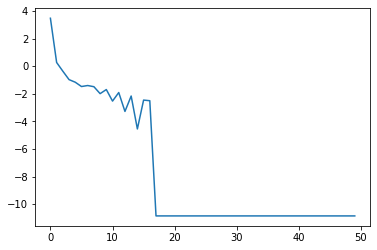

In [ ]:
#Batch size 50
#Let us prove it with lambda = 10^{-4} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-4,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-4,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-4,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

Let us check now the solution for $\lambda=10^{-2}$.

lambda=10^{-4} incrementing the mu by 1 and batch_size=10


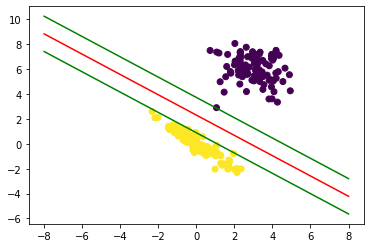

Objective function


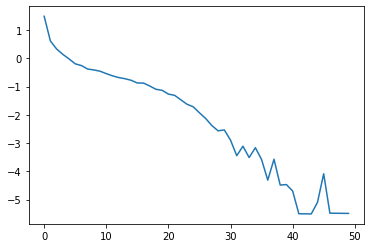

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10


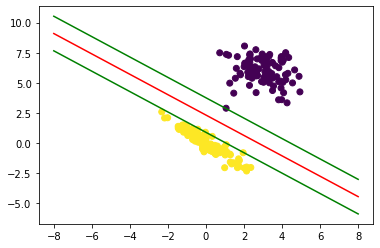

Objective function


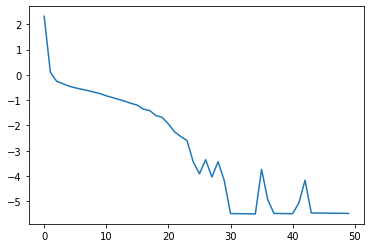

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10


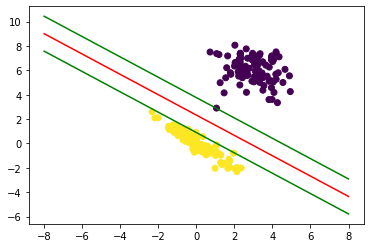

Objective function


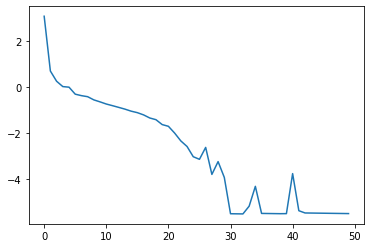

In [ ]:
#Batch size 10
#Let us prove it with lambda = 10^{-2} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2,50,10)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=10')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=20


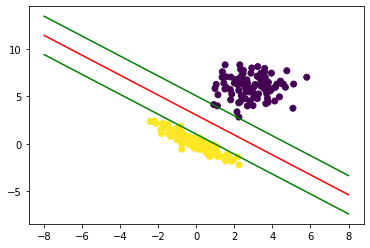

Objective function


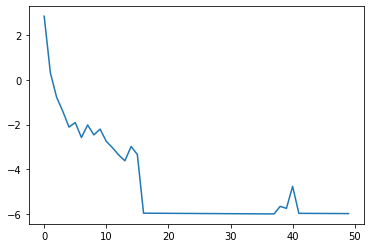

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=20


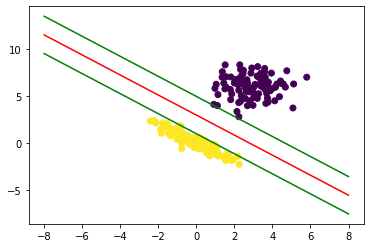

Objective function


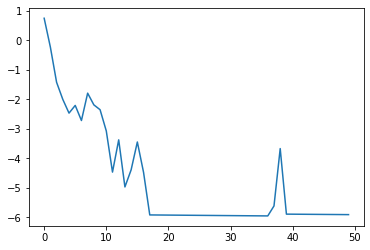

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=20


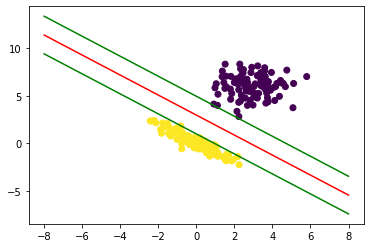

Objective function


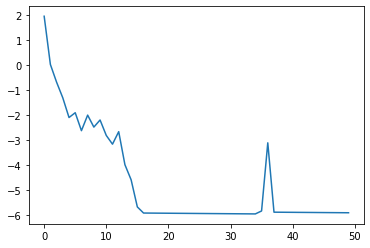

In [ ]:
#Batch size 20
#Let us prove it with lambda = 10^{-2} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2,50,20)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=20')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

lambda=10^{-4} incrementing the mu by 1 and batch_size=50


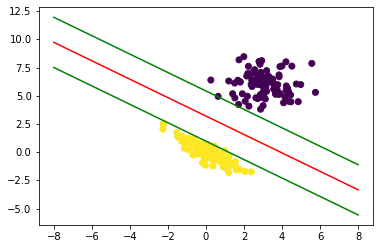

Objective function


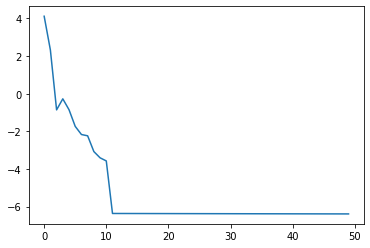

lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50


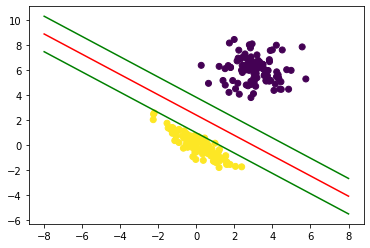

Objective function


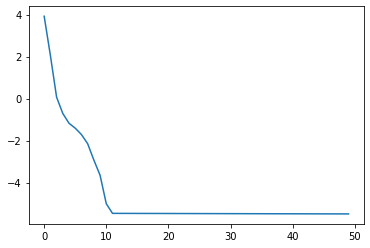

lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50


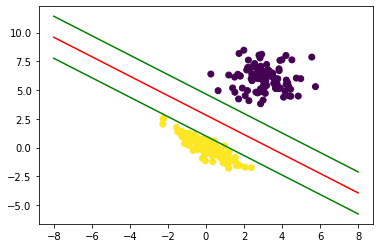

Objective function


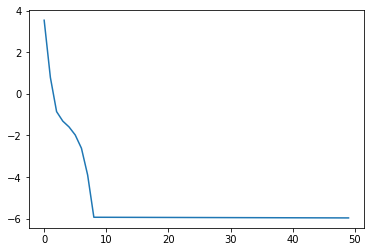

In [ ]:
#Batch size 50
#Let us prove it with lambda = 10^{-2} incrementing mu by 1, 0.5, 0.1 in this order
X,y = dataset(100)
w, b,function = sgd_batch(X, y, 100, 1, 1e-2,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.5, 1e-2,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.5 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()
w, b,function = sgd_batch(X, y, 100, 0.1, 1e-2,50,50)
#Let us plot it incrementing in 1 the mu
print('lambda=10^{-4} incrementing the mu by 0.1 and batch_size=50')
x = np.linspace(-8, 8, 100)
plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'g')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'g')
plt.show()
print('Objective function')
plt.plot(function)
plt.show()

As before, notice that for lower values of $\lambda$ the method converges fastly than for bigger ones. Moreover, it seems that for bigger batch sizes, the method converges fastly than for little batch sizes. Observes also that there are cases in which the hyperplanes at distance 1 or -1 are not perfect. This cases are mostly found when we set 50 of batch size for any value of $\lambda$, either $10^{-4}$ and $10^{-2}$.

##Experiment 3

We have to perform a plot of the logarithm of the function $f(w,b)$ along each epoch for the stochastic gradient descent, minibatch and gradient descent (which is equivalent to use a mini-batch with a size equal to the number of samples).This will allow us to see how fast each of the methods approaches the optimal solution.

You can see the plot of the logarithm of the function in the previous experiments. Notice that, in most cases, before arriving 50 epochs, the function becomes constant, hence, we are not longer learning and that is why we choose 50 the maximum number of epochs. The comparisons are made in previous cells.